In [ ]:
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
prices = pd.read_csv("average_prices.csv")
prices.head(10)

,Код территории,Наименование территории,"Говядина (кроме бескостного мяса), кг","Говядина бескостная, кг","Свинина (кроме бескостного мяса), кг","Свинина бескостная, кг","Баранина (кроме бескостного мяса), кг","Куры охлажденные и мороженые, кг","Окорочка куриные, кг","Мясо индейки, кг",...,"Аренда индивидуального банковского сейфа, в расчете на месяц","Комиссия банка за перевод средств с карты на карту клиенту другого банка на территории России, услуга","Годовая стоимость полиса добровольного страхования жилья от стандартных рисков, полис","Годовая стоимость полиса добровольного страхования легкового автомобиля от стандартных рисков (КАСКО), полис","Годовая стоимость полиса обязательного страхования гражданской ответственности владельцев транспортных средств (ОСАГО), полис","Занятия в плавательных бассейнах, месяц","Клубная карта в фитнес-клуб, месяц","Повторное получение гербового документа в органах ЗАГС, документ","Ксерокопирование документа, лист","Пользование общественным туалетом, посещение"
0,643,Российская Федерация,499.68,676.64,331.44,431.04,603.52,208.80,237.83,457.93,...,1262.71,144.27,7080.95,76055.74,13434.53,2386.34,2454.20,350.00,10.85,19.79
1,30,Центральный федеральный округ,570.93,732.25,325.60,423.69,732.72,203.15,238.81,506.82,...,1661.85,143.25,7357.57,77197.71,14732.33,2690.52,2612.80,350.00,15.65,28.09
2,14000000000,Белгородская область,423.50,566.88,265.83,356.68,528.99,188.09,199.38,357.96,...,1335.14,153.86,5921.62,36854.14,9493.28,1379.00,1598.22,350.00,10.00,15.00
3,14401000000,Белгород,408.69,559.87,257.05,359.76,528.99,186.92,195.34,345.58,...,1335.14,152.78,5921.62,36854.14,9213.86,1379.00,1611.74,350.00,10.00,15.00
4,14430000000,Губкин,417.86,562.90,236.34,379.35,...,180.41,206.47,342.49,...,...,145.65,...,...,9078.96,...,767.74,...,...,...
5,14440000000,Старый Оскол,455.86,582.91,299.46,338.06,...,194.63,203.44,390.95,...,...,160.53,...,...,10274.00,...,2030.27,...,...,...
6,15000000000,Брянская область,552.93,666.33,324.02,410.39,681.74,212.19,222.76,393.39,...,1800.00,150.00,7474.58,79746.68,7982.75,1867.58,3048.80,350.00,11.49,10.00
7,15401000000,Брянск,538.97,639.69,305.94,391.47,681.74,223.21,227.50,372.23,...,1800.00,150.00,7474.58,79746.68,7982.75,1867.58,3048.80,350.00,11.49,10.00
8,15238551000,Навля,...,936.47,305.75,450.64,...,191.58,201.24,484.01,...,...,...,...,...,...,...,...,...,...,...
9,15415000000,Клинцы,579.62,612.30,375.91,447.75,...,197.29,216.99,...,...,...,...,...,...,...,...,...,...,...,...


Продукты питания из потребительской корзины взяты с сайта министерства труда
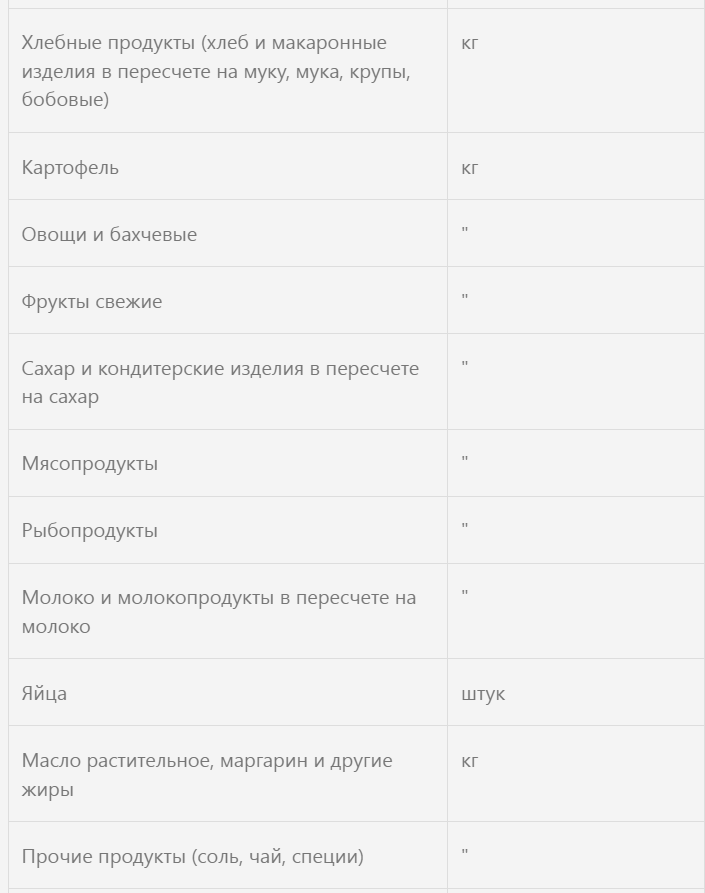

In [ ]:
ct = np.array(prices["Код территории"])
mark_column = list()

for i in range(len(ct)):
  s = str(ct[i])
  if len(s) < 3:
    mark_column.append(0)
  elif s[2] == "0":
    mark_column.append(1)
  else:
    mark_column.append(0)

Оставляю в массиве данных только области, с помощью mark_column, который сформирован на основе колонки "Код территории"


In [ ]:
temp_prices = prices
temp_prices["Marks"] = mark_column
temp_prices = temp_prices.loc[temp_prices["Marks"] == 1]
del temp_prices["Marks"]

tn = np.array(temp_prices["Наименование территории"])
mark_column = list()

for i in range(len(tn)):
  if tn[i] == 'Архангельская область (кроме Ненецкого автономного округа)':
    mark_column.append(0)
  elif tn[i] == 'Армавир':
    mark_column.append(0)
  elif tn[i] == 'Город федерального значения Севастополь':
    mark_column.append(0)
  elif tn[i] == 'Буденновск':
    mark_column.append(0)
  elif tn[i] == 'Ставрополь':
    mark_column.append(0)
  elif tn[i] == 'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)':
    mark_column.append(0)
  elif tn[i] == 'Барнаул':
    mark_column.append(0)
  elif tn[i] == 'Бийск':
    mark_column.append(0)
  elif tn[i] == 'Красноярск':
    mark_column.append(0)
  elif tn[i] == 'Ачинск':
    mark_column.append(0)
  elif tn[i] == 'Владивосток':
    mark_column.append(0)
  elif tn[i] == 'Хабаровск':
    mark_column.append(0)
  elif tn[i] == 'Комсомольск-на-Амуре':
    mark_column.append(0)
  elif tn[i] == 'Краснодар':
    mark_column.append(0)
  else:
    mark_column.append(1)

temp_prices["Marks"] = mark_column
temp_prices = temp_prices.loc[temp_prices["Marks"] == 1]
del temp_prices["Marks"]

temp_prices.head(10)

<ipython-input-32-7d775b34e8d4>:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_prices["Marks"] = mark_column
<ipython-input-32-7d775b34e8d4>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_prices["Marks"] = mark_column


,Код территории,Наименование территории,"Говядина (кроме бескостного мяса), кг","Говядина бескостная, кг","Свинина (кроме бескостного мяса), кг","Свинина бескостная, кг","Баранина (кроме бескостного мяса), кг","Куры охлажденные и мороженые, кг","Окорочка куриные, кг","Мясо индейки, кг",...,"Аренда индивидуального банковского сейфа, в расчете на месяц","Комиссия банка за перевод средств с карты на карту клиенту другого банка на территории России, услуга","Годовая стоимость полиса добровольного страхования жилья от стандартных рисков, полис","Годовая стоимость полиса добровольного страхования легкового автомобиля от стандартных рисков (КАСКО), полис","Годовая стоимость полиса обязательного страхования гражданской ответственности владельцев транспортных средств (ОСАГО), полис","Занятия в плавательных бассейнах, месяц","Клубная карта в фитнес-клуб, месяц","Повторное получение гербового документа в органах ЗАГС, документ","Ксерокопирование документа, лист","Пользование общественным туалетом, посещение"
2,14000000000,Белгородская область,423.50,566.88,265.83,356.68,528.99,188.09,199.38,357.96,...,1335.14,153.86,5921.62,36854.14,9493.28,1379.00,1598.22,350.00,10.00,15.00
6,15000000000,Брянская область,552.93,666.33,324.02,410.39,681.74,212.19,222.76,393.39,...,1800.00,150.00,7474.58,79746.68,7982.75,1867.58,3048.80,350.00,11.49,10.00
11,17000000000,Владимирская область,540.68,706.80,329.17,415.14,642.70,205.35,248.53,536.80,...,1120.09,150.00,6151.97,57981.07,15209.23,2093.56,2379.88,350.00,8.37,11.89
16,20000000000,Воронежская область,469.45,672.26,316.47,429.82,560.59,207.39,222.03,443.46,...,1580.75,150.00,7052.57,88140.56,15274.39,2537.03,1843.40,350.00,8.47,11.91
20,24000000000,Ивановская область,472.84,688.75,312.21,385.39,720.60,209.60,240.48,375.23,...,1325.24,150.00,4905.65,56900.48,15717.41,4800.00,1625.31,350.00,8.93,...
23,29000000000,Калужская область,573.19,751.53,318.64,468.43,687.93,189.85,236.68,446.38,...,1054.02,134.20,9851.05,73586.38,10920.92,2599.01,1662.29,350.00,10.37,...
27,34000000000,Костромская область,518.99,705.98,328.39,421.63,686.03,219.57,241.83,409.59,...,881.00,153.26,7330.75,45164.99,8138.27,2276.84,1733.70,350.00,7.52,15.87
30,38000000000,Курская область,468.65,702.00,293.98,407.02,618.60,203.58,214.48,542.23,...,1174.70,145.88,4616.41,45251.04,11406.90,2015.15,1073.44,350.00,7.82,12.92
34,42000000000,Липецкая область,450.43,621.19,279.26,381.24,564.79,185.84,211.41,475.57,...,1555.27,138.32,6347.70,81918.10,14091.06,1572.80,2493.49,350.00,9.17,17.87
37,46000000000,Московская область,561.22,702.21,360.09,424.90,641.63,198.53,236.15,512.37,...,1487.24,137.03,6688.68,65200.80,13492.03,2203.03,1979.09,350.00,17.61,23.89


Объединяю в одну колонку различные типы мяса, данные по котором полные

In [ ]:
meat_1 = np.array(temp_prices["Говядина (кроме бескостного мяса), кг"])
meat_2 = np.array(temp_prices["Говядина бескостная, кг"])
meat_3 = np.array(temp_prices["Куры охлажденные и мороженые, кг"])

meat_overall = meat_1.astype(float) + meat_2.astype(float) + meat_3.astype(float)
meat_overall = meat_overall / 3
meat_overall

array([392.82333333, 477.15      , 484.27666667, 449.7       ,
       457.06333333, 504.85666667, 481.51333333, 458.07666667,
       419.15333333, 487.32      , 493.78333333, 462.61333333,
       492.12666667, 410.16      , 500.30333333, 478.80666667,
       495.19333333, 528.06666667, 503.16666667, 489.23333333,
       522.96      , 501.15666667, 468.57      , 479.59666667,
       564.23      , 485.79      , 443.02      , 473.04333333,
       427.23333333, 378.42666667, 470.51      , 450.4       ,
       440.48666667, 430.62333333, 454.30666667, 403.72333333,
       396.84333333, 438.64      , 418.64666667, 416.99333333,
       408.94333333, 453.84666667, 454.92      , 441.26      ,
       426.12      , 453.81      , 472.18333333, 451.22666667,
       476.78      , 472.74      , 456.62      , 447.89      ,
       463.77666667, 460.64      , 458.03      , 450.95666667,
       466.73333333, 482.24      , 488.72666667, 463.88666667,
       448.95333333, 398.77333333, 438.02      , 437.79

Объединяю в одну колонку различные типы мясных продуктов, данные по котором полные

In [ ]:
meat_products1 = np.array(temp_prices["Фарш мясной, кг"])
meat_products2 = np.array(temp_prices["Печень говяжья, свиная, кг"])
meat_products3 = np.array(temp_prices["Пельмени, манты, равиоли, кг"])
meat_products4 = np.array(temp_prices["Колбаса вареная, кг"])
meat_products5 = np.array(temp_prices["Консервы мясные, кг"])

meat_products_overall = meat_products1.astype(float) + meat_products2.astype(float) + meat_products3.astype(float) + meat_products4.astype(float) + meat_products5.astype(float)
meat_products_overall = meat_products_overall / 5
meat_products_overall

array([343.182, 409.728, 420.496, 377.306, 401.754, 418.846, 400.604,
       344.318, 341.986, 478.332, 373.5  , 402.51 , 356.268, 343.13 ,
       403.194, 422.378, 447.372, 552.49 , 469.066, 406.836, 493.908,
       439.072, 435.398, 471.502, 550.466, 405.656, 383.062, 486.41 ,
       398.202, 408.574, 434.356, 422.976, 425.308, 340.836, 407.202,
       410.746, 433.308, 395.46 , 414.838, 386.566, 409.62 , 415.152,
       387.302, 397.952, 374.346, 395.546, 387.422, 341.05 , 418.326,
       398.   , 397.382, 363.078, 387.756, 384.822, 426.946, 431.612,
       438.132, 437.66 , 458.554, 439.03 , 394.972, 373.224, 410.766,
       404.82 , 427.614, 426.11 , 386.478, 415.072, 357.946, 422.92 ,
       397.804, 533.464, 449.814, 633.52 , 476.204, 486.192, 452.42 ,
       618.852, 542.664, 462.222, 820.058])

Объединяю в одну колонку различные типы рыбных продуктов, данные по котором полные

In [ ]:
fish1 = np.array(temp_prices["Креветки мороженые неразделаные, кг"])
fish2 = np.array(temp_prices["Рыба мороженая разделанная (кроме лососевых пород), кг"])
fish3 = np.array(temp_prices["Рыба охлажденная и мороженая разделанная лососевых пород, кг"])
fish4 = np.array(temp_prices["Рыба мороженая неразделанная, кг"])
fish5 = np.array(temp_prices["Филе рыбное, кг"])

fish_overall = fish1.astype(float) + fish2.astype(float) + fish3.astype(float) + fish4.astype(float) + fish5.astype(float)
fish_overall = fish_overall / 5
fish_overall

array([446.542, 572.612, 618.8  , 488.668, 552.926, 546.486, 590.508,
       546.31 , 385.646, 633.054, 538.734, 497.152, 497.818, 461.98 ,
       685.15 , 487.836, 625.348, 728.498, 564.39 , 596.436, 721.458,
       676.316, 670.612, 605.814, 681.802, 528.39 , 577.94 , 587.908,
       569.104, 635.464, 657.78 , 589.648, 605.942, 547.27 , 620.4  ,
       712.202, 770.292, 647.844, 676.27 , 669.494, 662.696, 672.088,
       481.812, 535.518, 423.888, 487.948, 529.404, 495.256, 556.098,
       506.694, 501.918, 527.892, 515.224, 543.4  , 517.612, 516.16 ,
       533.526, 551.694, 662.838, 545.908, 522.804, 535.39 , 477.038,
       521.032, 588.86 , 554.38 , 524.598, 514.33 , 478.93 , 457.114,
       517.24 , 637.396, 552.146, 578.434, 571.03 , 557.772, 478.88 ,
       600.624, 562.136, 546.664, 590.3  ])

Объединяю в одну колонку сливочное и растительное масла

In [ ]:
oil1 = np.array(temp_prices["Масло подсолнечное, л"])
oil2 = np.array(temp_prices["Масло сливочное, кг"])

oil_overall = oil1.astype(float) + oil2.astype(float)
oil_overall = oil_overall / 2
oil_overall

array([413.55 , 467.85 , 460.91 , 442.545, 435.615, 471.095, 444.65 ,
       417.21 , 407.215, 557.335, 466.93 , 431.53 , 421.35 , 444.295,
       518.285, 430.04 , 458.705, 606.94 , 509.45 , 494.54 , 564.115,
       542.37 , 458.14 , 550.135, 598.81 , 472.59 , 497.35 , 573.555,
       468.1  , 444.89 , 530.43 , 414.875, 454.87 , 399.24 , 410.225,
       463.4  , 434.935, 454.14 , 524.945, 447.555, 482.695, 479.72 ,
       402.915, 349.985, 388.11 , 370.105, 379.64 , 388.255, 450.59 ,
       393.075, 419.52 , 424.43 , 406.7  , 401.68 , 440.785, 424.06 ,
       461.915, 443.265, 508.165, 456.565, 460.515, 489.945, 492.495,
       426.265, 483.01 , 526.13 , 417.585, 470.095, 381.245, 412.025,
       557.5  , 601.23 , 607.64 , 612.75 , 598.075, 634.4  , 554.49 ,
       652.52 , 713.21 , 625.73 , 814.785])

Объединяю в одну колонку молоко (данные по которому полны) и творог

In [ ]:
milk1 = np.array(temp_prices["Молоко питьевое цельное стерилизованное 2,5-3,2% жирности, л"])
milk2 = np.array(temp_prices["Творог, кг"])

milk_overall = milk1.astype(float) + milk2.astype(float)
milk_overall = milk_overall / 2
milk_overall

array([202.615, 261.44 , 244.68 , 229.16 , 257.25 , 242.64 , 256.81 ,
       223.25 , 225.655, 268.48 , 244.165, 225.585, 227.365, 219.305,
       232.265, 234.695, 227.985, 280.275, 276.84 , 215.53 , 283.49 ,
       221.865, 212.985, 260.515, 276.755, 231.055, 234.03 , 288.775,
       259.455, 246.925, 270.935, 223.32 , 263.235, 216.395, 242.23 ,
       215.715, 203.175, 222.865, 239.055, 237.17 , 271.08 , 229.135,
       218.16 , 208.32 , 208.695, 204.3  , 190.725, 198.73 , 246.89 ,
       200.67 , 201.885, 235.945, 213.87 , 223.07 , 219.155, 237.195,
       239.15 , 239.13 , 255.425, 266.54 , 265.74 , 268.355, 275.46 ,
       245.555, 284.27 , 232.925, 235.44 , 249.83 , 216.46 , 223.935,
       284.275, 389.87 , 358.535, 422.85 , 314.95 , 327.16 , 266.885,
       401.505, 370.115, 325.825, 435.01 ])

Отделяю колонку яиц

In [ ]:
eggs_overall = np.array(temp_prices["Яйца куриные, 10 шт."])
eggs_overall

array([ 73.62,  73.68,  77.34,  67.97,  72.51,  78.88,  76.71,  70.12,
        68.44,  80.55,  72.81,  73.15,  73.1 ,  72.52,  73.84,  75.04,
        71.04,  95.44,  80.69,  77.04,  87.74,  81.24,  74.66,  84.25,
        87.99,  78.53,  76.93,  90.07,  69.31,  69.96,  85.58,  79.64,
        76.35,  65.46,  75.45,  76.48,  75.17,  72.95,  80.48,  78.95,
        83.19,  71.89,  66.08,  68.49,  57.33,  64.88,  68.21,  68.18,
        74.81,  68.04,  65.19,  66.32,  62.19,  72.24,  69.21,  65.42,
        74.26,  75.97,  91.7 ,  74.46,  74.78,  72.25,  70.08,  65.59,
        74.4 ,  80.66,  70.97,  80.4 ,  70.45,  76.58,  89.6 , 117.54,
        90.99, 144.06, 116.6 , 101.17, 102.91, 143.41, 127.61,  94.58,
       183.66])

Объединяю сахар-песок и шоколад в одну колонку

In [ ]:
sugar1 = np.array(temp_prices["Сахар-песок, кг"])
sugar2 = np.array(temp_prices["Шоколад, кг"])

sugar_overall = sugar1.astype(float) + sugar2.astype(float)
sugar_overall = sugar_overall / 2
sugar_overall

array([592.855, 648.14 , 587.77 , 480.66 , 465.84 , 521.31 , 630.775,
       445.84 , 531.635, 600.135, 467.38 , 501.2  , 514.71 , 518.96 ,
       520.745, 493.215, 520.15 , 682.875, 538.965, 567.41 , 685.05 ,
       571.455, 599.67 , 544.155, 717.755, 519.035, 469.4  , 690.29 ,
       534.17 , 438.32 , 579.62 , 566.035, 529.505, 483.175, 521.34 ,
       414.975, 406.87 , 427.93 , 455.29 , 467.245, 436.825, 509.535,
       446.75 , 488.11 , 477.795, 469.72 , 442.97 , 478.96 , 514.665,
       509.105, 519.39 , 414.615, 515.53 , 550.315, 458.59 , 528.035,
       548.975, 562.435, 528.475, 486.64 , 561.405, 524.31 , 617.785,
       530.8  , 645.33 , 559.275, 475.4  , 485.035, 491.78 , 576.74 ,
       553.06 , 675.17 , 642.605, 732.4  , 733.33 , 869.5  , 655.595,
       845.28 , 761.325, 791.465, 968.895])

Объединяю прочие продукты в одну колонку

In [ ]:
other1 = np.array(temp_prices["Чай черный байховый, кг"])
other2 = np.array(temp_prices["Чай зеленый, кг"])
other3 = np.array(temp_prices["Сухие приправы, специи, кг"])
other4 = np.array(temp_prices["Соль поваренная пищевая, кг"])

other_overall = other1.astype(float) + other2.astype(float) + other3.astype(float) + other4.astype(float)
other_overall = other_overall / 4
other_overall

array([ 897.31  , 1222.9825, 1247.6725,  903.635 , 1073.07  , 1149.98  ,
       1119.88  ,  942.5425,  680.465 , 1279.0475,  984.52  , 1137.985 ,
        984.455 ,  936.58  , 1095.095 ,  944.005 , 1218.8675, 1537.49  ,
       1223.785 , 1090.1325, 1537.885 , 1323.705 , 1332.8925, 1269.1275,
       1495.75  , 1257.7375, 1114.3375, 1364.565 ,  902.7525, 1037.7425,
       1127.9725, 1093.4725, 1160.7125,  815.2225, 1068.255 ,  964.545 ,
        907.235 , 1069.745 , 1048.7975, 1039.1675, 1057.97  , 1209.9725,
        938.13  ,  863.175 , 1054.6925,  869.705 ,  988.3275,  822.09  ,
       1055.545 , 1023.8875, 1076.4625,  887.8825,  959.5525,  885.1475,
        984.385 , 1181.6575,  962.24  , 1073.17  , 1149.6075,  984.53  ,
        958.2675,  847.87  , 1111.5375,  987.9575,  979.335 ,  903.225 ,
        926.8275, 1002.66  ,  755.45  ,  940.585 ,  690.49  , 1191.7025,
       1076.24  , 2226.2725, 1194.2175, 1239.8725,  913.085 , 1235.385 ,
       1290.9125,  932.0175, 1468.4375])

Объединяю фрукты в одну колонку

In [ ]:
fruits1 = np.array(temp_prices["Яблоки, кг"])
fruits2 = np.array(temp_prices["Апельсины, кг"])
fruits3 = np.array(temp_prices["Бананы, кг"])

fruits_overall = fruits1.astype(float) + fruits2.astype(float) + fruits3.astype(float)
fruits_overall = fruits_overall / 3
fruits_overall

array([106.8       , 133.85333333, 150.22333333, 119.59666667,
       141.31      , 131.44333333, 130.11      , 136.07666667,
       121.82      , 138.96666667, 137.62      , 135.66666667,
       138.20333333, 113.63333333, 144.73      , 146.96      ,
       139.55      , 149.02333333, 149.29      , 158.56333333,
       164.11333333, 146.70666667, 146.58666667, 144.59666667,
       152.35      , 144.57666667, 149.91333333, 155.59333333,
        95.28666667, 115.07      , 132.49666667, 140.65666667,
       114.78      , 120.48666667, 125.20333333, 132.88      ,
       128.17666667, 135.49333333, 135.89666667, 124.41666667,
       146.43333333, 123.22666667, 127.35      , 130.11      ,
       125.39333333, 128.94      , 141.08666667, 127.82333333,
       145.87666667, 142.60666667, 114.85666667, 141.29666667,
       126.13      , 128.21      , 121.07333333, 124.01666667,
       142.87      , 149.58666667, 151.63333333, 142.79      ,
       143.56      , 184.61      , 176.83      , 157.03

ОбЪединяю овощи и бахчевые в одну колонку

In [ ]:
veg1 = np.array(temp_prices["Капуста белокочанная свежая, кг"])
veg2 = np.array(temp_prices["Лук репчатый, кг"])
veg3 = np.array(temp_prices["Свёкла столовая, кг"])
veg4 = np.array(temp_prices["Морковь, кг"])
veg5 = np.array(temp_prices["Чеснок, кг"])
veg6 = np.array(temp_prices["Помидоры свежие, кг"])
veg7 = np.array(temp_prices["Горох и фасоль, кг"])

veg_overall = veg1.astype(float) + veg2.astype(float) + veg3.astype(float) + veg4.astype(float) + veg5.astype(float) + veg6.astype(float) + veg7.astype(float)
veg_overall = veg_overall / 7
veg_overall

array([ 72.92142857,  82.07857143,  82.92      ,  71.65571429,
        84.58      ,  81.23428571,  83.33142857,  88.05285714,
        70.30571429,  91.09714286,  76.96428571,  80.34571429,
        84.91142857,  74.26714286,  82.89428571,  85.94571429,
        83.95571429, 104.81285714, 104.62428571,  91.17714286,
       105.83714286,  91.88142857, 109.86142857,  95.56428571,
       106.75714286,  94.03285714, 100.47142857,  96.76571429,
        81.06428571,  80.33142857,  73.81428571,  91.22      ,
        89.21857143,  77.37142857,  81.94285714,  80.43      ,
        97.37857143,  84.90714286,  84.55      ,  75.53285714,
        94.34      ,  87.43      ,  73.54714286,  79.73857143,
        72.91428571,  74.73285714,  82.17571429,  71.43285714,
        89.84428571,  78.72      ,  76.42571429,  82.45714286,
        71.91714286,  76.15571429,  79.44714286,  74.92857143,
        94.08714286,  92.46142857, 107.23857143,  90.52142857,
       101.36285714, 101.77285714, 103.04714286,  85.40

Отдельно добавляю колонку картофеля

In [ ]:
potato_overall = np.array(temp_prices["Картофель, кг"])
potato_overall

array([ 25.32,  26.75,  30.03,  25.41,  30.02,  27.29,  28.12,  31.67,
        21.6 ,  28.71,  26.55,  29.53,  25.61,  24.05,  25.5 ,  29.03,
        28.67,  35.25,  35.37,  38.77,  47.07,  33.42,  40.78,  35.99,
        44.14,  32.05,  35.2 ,  39.8 ,  32.18,  31.6 ,  34.58,  37.2 ,
        34.19,  28.27,  34.49,  31.54,  44.1 ,  31.21,  34.19,  29.97,
        37.27,  32.45,  31.36,  28.01,  27.41,  30.23,  30.47,  28.41,
        36.47,  31.59,  25.69,  34.94,  23.58,  29.68,  28.04,  26.76,
        38.46,  37.16,  44.35,  38.87,  50.74,  44.95,  51.07,  40.87,
        60.35,  59.34,  38.5 ,  38.54,  34.86,  44.93,  54.17,  97.37,
        70.8 ,  97.96,  87.02,  73.41,  68.24, 129.17,  89.23,  73.96,
       213.91])

Объединяю хлебобулочные изделия в одну колонку

In [ ]:
br1 = np.array(temp_prices["Вермишель, кг"])
br2 = np.array(temp_prices["Макаронные изделия из пшеничной муки высшего сорта, кг"])
br3 = np.array(temp_prices["Мука пшеничная, кг"])
br4 = np.array(temp_prices["Хлеб из ржаной муки и из смеси муки ржаной и пшеничной, кг"])
br5 = np.array(temp_prices["Хлеб и булочные изделия из пшеничной муки различных сортов, кг"])

br_overall = br1.astype(float) + br2.astype(float) + br3.astype(float) + br4.astype(float) + br5.astype(float)
br_overall = br_overall / 5
br_overall

array([ 62.21 ,  80.92 ,  77.006,  61.232,  85.748,  84.194,  79.452,
        63.222,  62.318,  98.338,  81.228,  76.516,  89.38 ,  68.588,
        85.662,  72.45 ,  76.804, 118.476, 109.83 , 113.312, 129.53 ,
       101.222, 116.41 , 107.904, 125.038,  92.454, 104.3  , 109.552,
        70.026,  83.742,  76.508,  89.442,  83.35 ,  58.908,  78.366,
        80.404,  94.53 ,  79.188,  81.476,  75.342,  76.008,  85.576,
        67.17 ,  66.638,  60.532,  61.698,  73.3  ,  67.19 ,  82.752,
        66.066,  71.53 ,  66.772,  63.918,  67.06 ,  65.882,  69.7  ,
        69.366,  90.306, 107.204,  89.568,  87.822,  71.646,  83.65 ,
        78.26 ,  93.37 ,  79.544,  84.84 ,  89.976,  73.452,  84.406,
        85.3  , 133.134, 101.45 , 135.822, 103.832, 120.216,  90.548,
       142.764, 139.036,  93.346, 203.314])

Создаю новый датасет, состоящий из обработанных колонок, которые отржают продовольственную корзину

In [ ]:
products_data = temp_prices[["Код территории"]]
products_data["Наименование территории"] = temp_prices["Наименование территории"]
products_data["Мясо"] = meat_overall
products_data["Мясопродукты"] = meat_products_overall
products_data["Рыбопродукты"] = fish_overall
products_data["Масло (растительное и сливочное)"] = oil_overall
products_data["Молочные продукты"] = milk_overall
products_data["Яйца"] = eggs_overall
products_data["Сахар и производные"] = sugar_overall
products_data["Прочие продукты"] = other_overall
products_data["Фрукты"] = fruits_overall
products_data["Овощи"] = veg_overall
products_data["Картофель"] = potato_overall
products_data["Хлебобулочные изделия"] = br_overall

products_data.head(10)

<ipython-input-132-9cd43fd580d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_data["Наименование территории"] = temp_prices["Наименование территории"]
<ipython-input-132-9cd43fd580d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_data["Мясо"] = meat_overall
<ipython-input-132-9cd43fd580d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия
2,14000000000,Белгородская область,392.823333,343.182,446.542,413.550,202.615,73.62,592.855,897.3100,106.800000,72.921429,25.32,62.210
6,15000000000,Брянская область,477.150000,409.728,572.612,467.850,261.440,73.68,648.140,1222.9825,133.853333,82.078571,26.75,80.920
11,17000000000,Владимирская область,484.276667,420.496,618.800,460.910,244.680,77.34,587.770,1247.6725,150.223333,82.920000,30.03,77.006
16,20000000000,Воронежская область,449.700000,377.306,488.668,442.545,229.160,67.97,480.660,903.6350,119.596667,71.655714,25.41,61.232
20,24000000000,Ивановская область,457.063333,401.754,552.926,435.615,257.250,72.51,465.840,1073.0700,141.310000,84.580000,30.02,85.748
23,29000000000,Калужская область,504.856667,418.846,546.486,471.095,242.640,78.88,521.310,1149.9800,131.443333,81.234286,27.29,84.194
27,34000000000,Костромская область,481.513333,400.604,590.508,444.650,256.810,76.71,630.775,1119.8800,130.110000,83.331429,28.12,79.452
30,38000000000,Курская область,458.076667,344.318,546.310,417.210,223.250,70.12,445.840,942.5425,136.076667,88.052857,31.67,63.222
34,42000000000,Липецкая область,419.153333,341.986,385.646,407.215,225.655,68.44,531.635,680.4650,121.820000,70.305714,21.60,62.318
37,46000000000,Московская область,487.320000,478.332,633.054,557.335,268.480,80.55,600.135,1279.0475,138.966667,91.097143,28.71,98.338


Выбор количества кластеров с помощью метода локтя

In [ ]:
x = list()
y = list()
clust_data = products_data[["Мясо", "Мясопродукты", "Рыбопродукты", "Масло (растительное и сливочное)", "Молочные продукты", "Яйца", "Сахар и производные", "Прочие продукты", "Фрукты", "Овощи", "Картофель", "Хлебобулочные изделия"]]

for i in range(1, 20):
  x.append(i)
  km1 = KMeans(n_clusters = i, init = 'k-means++')
  km1.fit(clust_data)
  y.append(km1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Вывожу график внутренней дисперсии для каждого количества кластеров

<function matplotlib.pyplot.show(close=None, block=None)>

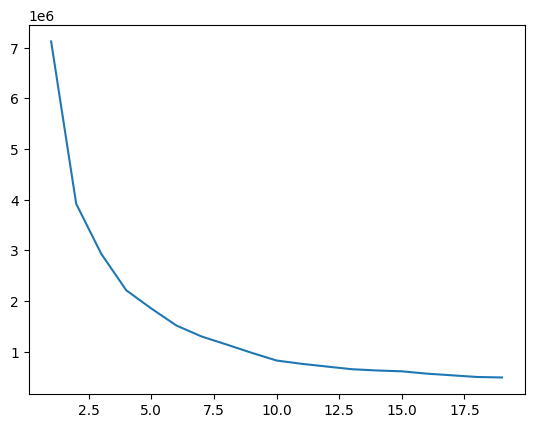

In [ ]:
plt.plot(x, y)
plt.show

На основе графика можно сделать вывод, что оптимально сделать около 10 кластеров

In [ ]:
km = KMeans(n_clusters = 10, init = "k-means++")
clust_column = km.fit_predict(clust_data)
products_data["Принадлежность к кластеру"] = clust_column
products_data.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-139-e9edd75af152>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_data["Принадлежность к кластеру"] = clust_column


,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
2,14000000000,Белгородская область,392.823333,343.182,446.542,413.550,202.615,73.62,592.855,897.3100,106.800000,72.921429,25.32,62.210,1
6,15000000000,Брянская область,477.150000,409.728,572.612,467.850,261.440,73.68,648.140,1222.9825,133.853333,82.078571,26.75,80.920,8
11,17000000000,Владимирская область,484.276667,420.496,618.800,460.910,244.680,77.34,587.770,1247.6725,150.223333,82.920000,30.03,77.006,8
16,20000000000,Воронежская область,449.700000,377.306,488.668,442.545,229.160,67.97,480.660,903.6350,119.596667,71.655714,25.41,61.232,1
20,24000000000,Ивановская область,457.063333,401.754,552.926,435.615,257.250,72.51,465.840,1073.0700,141.310000,84.580000,30.02,85.748,3
23,29000000000,Калужская область,504.856667,418.846,546.486,471.095,242.640,78.88,521.310,1149.9800,131.443333,81.234286,27.29,84.194,3
27,34000000000,Костромская область,481.513333,400.604,590.508,444.650,256.810,76.71,630.775,1119.8800,130.110000,83.331429,28.12,79.452,3
30,38000000000,Курская область,458.076667,344.318,546.310,417.210,223.250,70.12,445.840,942.5425,136.076667,88.052857,31.67,63.222,1
34,42000000000,Липецкая область,419.153333,341.986,385.646,407.215,225.655,68.44,531.635,680.4650,121.820000,70.305714,21.60,62.318,9
37,46000000000,Московская область,487.320000,478.332,633.054,557.335,268.480,80.55,600.135,1279.0475,138.966667,91.097143,28.71,98.338,8


Объединяем полученные кластеры в отдельные таблицы

In [ ]:
cluster_0 = products_data.loc[products_data["Принадлежность к кластеру"] == 0]
cluster_1 = products_data.loc[products_data["Принадлежность к кластеру"] == 1]
cluster_2 = products_data.loc[products_data["Принадлежность к кластеру"] == 2]
cluster_3 = products_data.loc[products_data["Принадлежность к кластеру"] == 3]
cluster_4 = products_data.loc[products_data["Принадлежность к кластеру"] == 4]
cluster_5 = products_data.loc[products_data["Принадлежность к кластеру"] == 5]
cluster_6 = products_data.loc[products_data["Принадлежность к кластеру"] == 6]
cluster_7 = products_data.loc[products_data["Принадлежность к кластеру"] == 7]
cluster_8 = products_data.loc[products_data["Принадлежность к кластеру"] == 8]
cluster_9 = products_data.loc[products_data["Принадлежность к кластеру"] == 9]

Состав кластеров:

In [ ]:
cluster_0.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
295,4000000000,Красноярский край,466.213333,427.614,588.860,483.01,284.270,74.40,645.330,979.3350,177.990000,104.582857,60.35,93.370,0
341,76000000000,Забайкальский край,462.826667,449.814,552.146,607.64,358.535,90.99,642.605,1076.2400,190.533333,121.485714,70.80,101.450,0
357,10000000000,Амурская область,497.796667,452.420,478.880,554.49,266.885,102.91,655.595,913.0850,191.260000,120.048571,68.24,90.548,0
371,99000000000,Еврейская автономная область,542.996667,462.222,546.664,625.73,325.825,94.58,791.465,932.0175,192.730000,110.428571,73.96,93.346,0


In [ ]:
cluster_1.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
2,14000000000,Белгородская область,392.823333,343.182,446.542,413.550,202.615,73.62,592.855,897.3100,106.800000,72.921429,25.32,62.210,1
16,20000000000,Воронежская область,449.700000,377.306,488.668,442.545,229.160,67.97,480.660,903.6350,119.596667,71.655714,25.41,61.232,1
30,38000000000,Курская область,458.076667,344.318,546.310,417.210,223.250,70.12,445.840,942.5425,136.076667,88.052857,31.67,63.222,1
53,54000000000,Орловская область,493.783333,373.500,538.734,466.930,244.165,72.81,467.380,984.5200,137.620000,76.964286,26.55,81.228,1
62,66000000000,Смоленская область,492.126667,356.268,497.818,421.350,227.365,73.10,514.710,984.4550,138.203333,84.911429,25.61,89.380,1


In [ ]:
cluster_2.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
82,45000000000,Город Москва столица Российской Федерации горо...,528.066667,552.490,728.498,606.940,280.275,95.44,682.875,1537.490,149.023333,104.812857,35.25,118.476,2
92,11000000000,Архангельская область,522.960000,493.908,721.458,564.115,283.490,87.74,685.050,1537.885,164.113333,105.837143,47.07,129.530,2
117,47000000000,Мурманская область,564.230000,550.466,681.802,598.810,276.755,87.99,717.755,1495.750,152.350000,106.757143,44.14,125.038,2
130,40000000000,Город Санкт-Петербург город федерального значения,473.043333,486.410,587.908,573.555,288.775,90.07,690.290,1364.565,155.593333,96.765714,39.80,109.552,2


In [ ]:
cluster_3.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
20,24000000000,Ивановская область,457.063333,401.754,552.926,435.615,257.250,72.51,465.840,1073.0700,141.310000,84.580000,30.02,85.748,3
23,29000000000,Калужская область,504.856667,418.846,546.486,471.095,242.640,78.88,521.310,1149.9800,131.443333,81.234286,27.29,84.194,3
27,34000000000,Костромская область,481.513333,400.604,590.508,444.650,256.810,76.71,630.775,1119.8800,130.110000,83.331429,28.12,79.452,3
57,61000000000,Рязанская область,462.613333,402.510,497.152,431.530,225.585,73.15,501.200,1137.9850,135.666667,80.345714,29.53,76.516,3
88,87000000000,Республика Коми,489.233333,406.836,596.436,494.540,215.530,77.04,567.410,1090.1325,158.563333,91.177143,38.77,113.312,3


In [ ]:
cluster_4.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
70,28000000000,Тверская область,500.303333,403.194,685.150,518.285,232.265,73.84,520.745,1095.0950,144.730000,82.894286,25.50,85.662,4
134,85000000000,Республика Калмыкия,378.426667,408.574,635.464,444.890,246.925,69.96,438.320,1037.7425,115.070000,80.331429,31.60,83.742,4
166,82000000000,Республика Дагестан,403.723333,410.746,712.202,463.400,215.715,76.48,414.975,964.5450,132.880000,80.430000,31.54,80.404,4
171,26000000000,Республика Ингушетия,396.843333,433.308,770.292,434.935,203.175,75.17,406.870,907.2350,128.176667,97.378571,44.10,94.530,4
175,83000000000,Кабардино-Балкарская Республика,438.640000,395.460,647.844,454.140,222.865,72.95,427.930,1069.7450,135.493333,84.907143,31.21,79.188,4


In [ ]:
cluster_5.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
346,30000000000,Камчатский край,697.913333,633.52,578.434,612.75,422.85,144.06,732.4,2226.2725,252.366667,185.997143,97.96,135.822,5


In [ ]:
cluster_6.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
333,98000000000,Республика Саха (Якутия),527.820000,533.464,637.396,601.230,389.870,117.54,675.170,1191.7025,245.396667,180.927143,97.37,133.134,6
349,5000000000,Приморский край,545.290000,476.204,571.030,598.075,314.950,116.60,733.330,1194.2175,187.110000,125.924286,87.02,103.832,6
354,8000000000,Хабаровский край,530.100000,486.192,557.772,634.400,327.160,101.17,869.500,1239.8725,181.073333,125.155714,73.41,120.216,6
362,44000000000,Магаданская область,625.216667,618.852,600.624,652.520,401.505,143.41,845.280,1235.3850,278.863333,213.420000,129.17,142.764,6
366,64000000000,Сахалинская область,570.753333,542.664,562.136,713.210,370.115,127.61,761.325,1290.9125,255.356667,141.741429,89.23,139.036,6


In [ ]:
cluster_7.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
373,77000000000,Чукотский автономный округ,693.123333,820.058,590.3,814.785,435.01,183.66,968.895,1468.4375,514.88,335.884286,213.91,203.314,7


In [ ]:
cluster_8.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
6,15000000000,Брянская область,477.150000,409.728,572.612,467.850,261.440,73.68,648.140,1222.9825,133.853333,82.078571,26.75,80.920,8
11,17000000000,Владимирская область,484.276667,420.496,618.800,460.910,244.680,77.34,587.770,1247.6725,150.223333,82.920000,30.03,77.006,8
37,46000000000,Московская область,487.320000,478.332,633.054,557.335,268.480,80.55,600.135,1279.0475,138.966667,91.097143,28.71,98.338,8
79,78000000000,Ярославская область,495.193333,447.372,625.348,458.705,227.985,71.04,520.150,1218.8675,139.550000,83.955714,28.67,76.804,8
84,86000000000,Республика Карелия,503.166667,469.066,564.390,509.450,276.840,80.69,538.965,1223.7850,149.290000,104.624286,35.37,109.830,8


In [ ]:
cluster_9.head(5)

,Код территории,Наименование территории,Мясо,Мясопродукты,Рыбопродукты,Масло (растительное и сливочное),Молочные продукты,Яйца,Сахар и производные,Прочие продукты,Фрукты,Овощи,Картофель,Хлебобулочные изделия,Принадлежность к кластеру
34,42000000000,Липецкая область,419.153333,341.986,385.646,407.215,225.655,68.44,531.635,680.4650,121.820000,70.305714,21.60,62.318,9
153,18000000000,Волгоградская область,430.623333,340.836,547.270,399.240,216.395,65.46,483.175,815.2225,120.486667,77.371429,28.27,58.908,9
197,88000000000,Республика Марий Эл,441.260000,397.952,535.518,349.985,208.320,68.49,488.110,863.1750,130.110000,79.738571,28.01,66.638,9
203,92000000000,Республика Татарстан (Татарстан),453.810000,395.546,487.948,370.105,204.300,64.88,469.720,869.7050,128.940000,74.732857,30.23,61.698,9
211,97000000000,Чувашская Республика - Чувашия,451.226667,341.050,495.256,388.255,198.730,68.18,478.960,822.0900,127.823333,71.432857,28.41,67.190,9


Состав кластеров зачасую перекликается с территориальным расположением областей, за редким исключением

Присутствуют два выброса: камчатский край и чукотский округ

Они в своих кластерах находятся одни, в чукотском округе цены на многие продукты заметно выше, чем в остальных регионах